<a href="https://colab.research.google.com/github/TanyamonSiri/Machine_Learning_Project/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Coursework 🧑

Customer segmentation is used to discrete customer groups that have similar characteristics, such as demographics, geographic, behaviorals, etc.

**Benefits of Customer Segemntation:**

Customer segmentation allows business to
- identify the segment that are the core value of the business
- tailor their marketing campaigns to specific customer segments
- as the campaign becomes more personalized, the overall customer satisfaction and experience would eventually be improved


## Install PyCaret and import libraries

In [2]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.9 MB/s eta 0:00:00

In [22]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [4]:
# Check
from pycaret.clustering import *

## Load dataset directly from Kaggle

Mall Customer Segmentation Data: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [5]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# make directory name ".kaggle"
! mkdir ~/.kaggle
# copy the ".kaggle.json" into new directory
! cp kaggle.json ~/.kaggle/
# Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
# download file from kaggle
! kaggle datasets download vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.43MB/s]


In [9]:
# unzip file
! unzip /content/customer-segmentation-tutorial-in-python.zip

Archive:  /content/customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [10]:
# remove unused file
! rm /content/customer-segmentation-tutorial-in-python.zip
! rm /content/kaggle.json

## Data Preparation

In [29]:
# create dataframe
df = pd.read_csv('/content/Mall_Customers.csv')

In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [75]:
# checking for missing values
df.isnull().sum() # no missing values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
df.shape

(200, 5)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
# encode gender column
label_encoder = preprocessing.LabelEncoder()
df1 = df.copy()
df1['Gender']=label_encoder.fit_transform(df1['Gender'])

In [34]:
df1['Gender'].unique()

array([1, 0])

In [35]:
df1.head() # Gender column is already encoded (Male=1, Female=0)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [36]:
# check data type
df1.info() # all columns are int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [37]:
plt.rcParams['figure.figsize'] = [6,5]
# calcualte correaltion between column (except for 'CustomerID')
cmat = df1.iloc[:,1:].corr()
cmat

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


Text(0.5, 1.0, 'Heatmap of Original data')

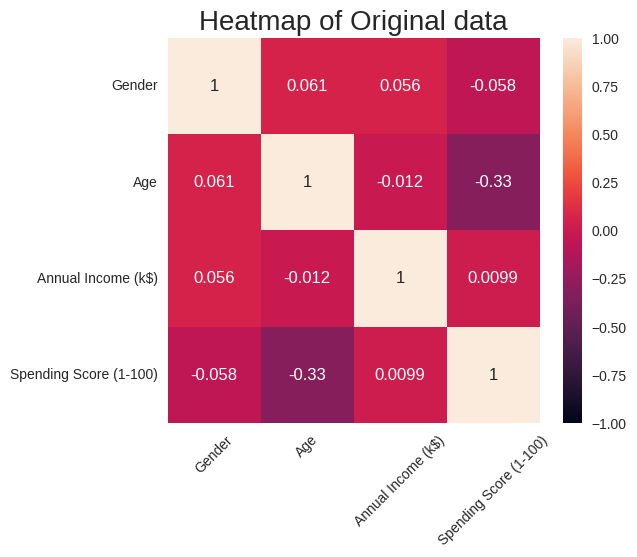

In [38]:
# create heatmap to show correlation
chart = sns.heatmap(cmat,vmin = -1, vmax = 1, annot=True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_yticklabels(chart.get_yticklabels(), rotation=0)
chart.set_title('Heatmap of Original data', fontsize = 20)

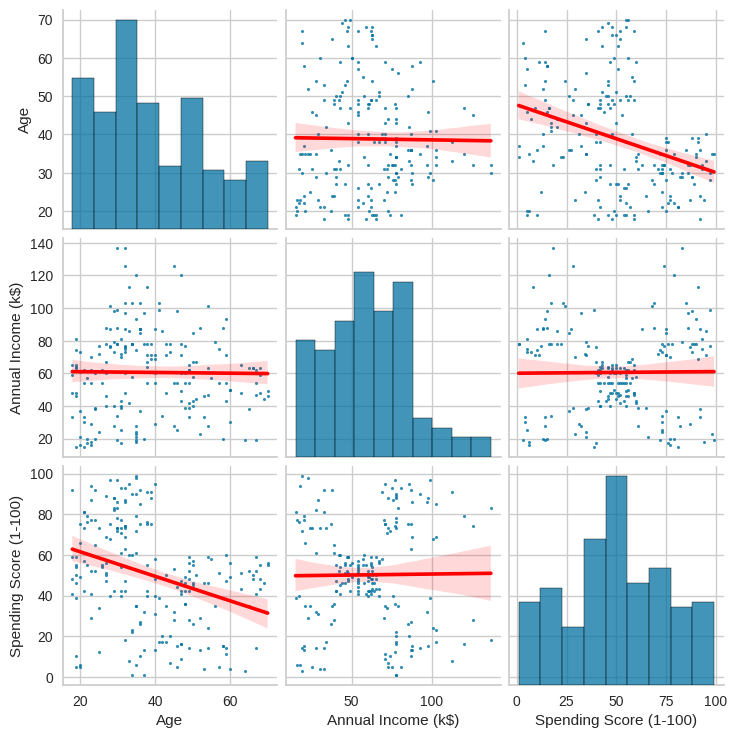

In [39]:
# create scatter plot with regression line to explore the relationship
plot_kws = {'scatter_kws': {'s': 5}, 'line_kws': {'color': 'red'}}
sns.pairplot(df1, kind='reg', vars=df1.columns[2:], plot_kws=plot_kws)
plt.show()

In [40]:
# preprocess data
s = setup(df, normalize = False,
                    ignore_features = ['CustomerID'],
                    ordinal_features = {'Gender' : ['Male', 'Female']},
                    session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 4)"
3,Ignore features,1
4,Ordinal features,1
5,Numeric features,3
6,Categorical features,1
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [41]:
df_preprocess = get_config('X')

In [43]:
df_preprocess

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [44]:
df_preprocess.dtypes

Gender                    category
Age                           int8
Annual Income (k$)           int32
Spending Score (1-100)        int8
dtype: object

## K-means Clustering

- Using euclidean distance to sort the cluster
- Need to input k (no of cluster)

In [45]:
# train k-means model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4053,127.9248,0.8918,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [47]:
print(kmeans)

KMeans(n_clusters=4, random_state=123)


In [48]:
# clustering model evaluation
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7fb26f8104c0>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7fb26f8...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7fb26f810700>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7fb26f7b1900>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7fb26f7b17e0>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7fb26f7b1990>,make_scorer(completeness_score),pred,{},True,True,False


In [49]:
# assign cluster labels on training data
kmeans_results = assign_model(kmeans)

In [50]:
kmeans_results.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 0
1,Male,21,15,81,Cluster 0
2,Female,20,16,6,Cluster 2
3,Female,23,16,77,Cluster 0
4,Female,31,17,40,Cluster 2


In [52]:
kmeans_results['Cluster'].unique()

array(['Cluster 0', 'Cluster 2', 'Cluster 1', 'Cluster 3'], dtype=object)

In [53]:
# plot kmeans model
plot_model(kmeans, 'cluster')

### Using elbow method to find k

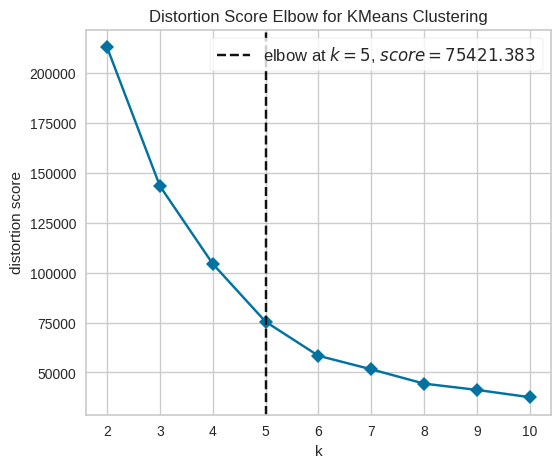

In [54]:
plot_model(kmeans, 'elbow') # k = 5

In [55]:
# set k = 5
new_kmeans = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4434,150.8887,0.8227,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [56]:
# plot kmeans model
plot_model(new_kmeans, 'cluster')

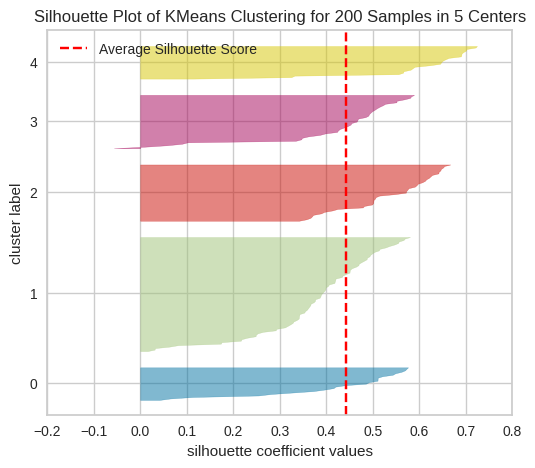

In [57]:
# plot silhouette score to check the quality of each cluster
plot_model(new_kmeans, 'silhouette')

In [58]:
# Show size of each cluster
plot_model(new_kmeans, plot = 'distribution')

### 3D plot of Clusters

In [84]:
plot_model(new_kmeans, plot = 'tsne')

In [60]:
plot_model(new_kmeans, plot = 'distribution', feature = 'Age')

In [61]:
evaluate_model(new_kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [62]:
# save model
save_model(new_kmeans, 'clustering_model_k5')
result_k5 = assign_model(new_kmeans)


Transformation Pipeline and Model Successfully Saved


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,Cluster 0
1,Male,21,15,81,Cluster 4
2,Female,20,16,6,Cluster 0
3,Female,23,16,77,Cluster 4
4,Female,31,17,40,Cluster 0
5,Female,22,17,76,Cluster 4
6,Female,35,18,6,Cluster 0
7,Female,23,18,94,Cluster 4
8,Male,64,19,3,Cluster 0
9,Female,30,19,72,Cluster 4


In [63]:
result_k5.head()

<bound method NDFrame.head of      Gender  Age  Annual Income (k$)  Spending Score (1-100)    Cluster
0      Male   19                  15                      39  Cluster 0
1      Male   21                  15                      81  Cluster 4
2    Female   20                  16                       6  Cluster 0
3    Female   23                  16                      77  Cluster 4
4    Female   31                  17                      40  Cluster 0
..      ...  ...                 ...                     ...        ...
195  Female   35                 120                      79  Cluster 2
196  Female   45                 126                      28  Cluster 3
197    Male   32                 126                      74  Cluster 2
198    Male   32                 137                      18  Cluster 3
199    Male   30                 137                      83  Cluster 2

[200 rows x 5 columns]>

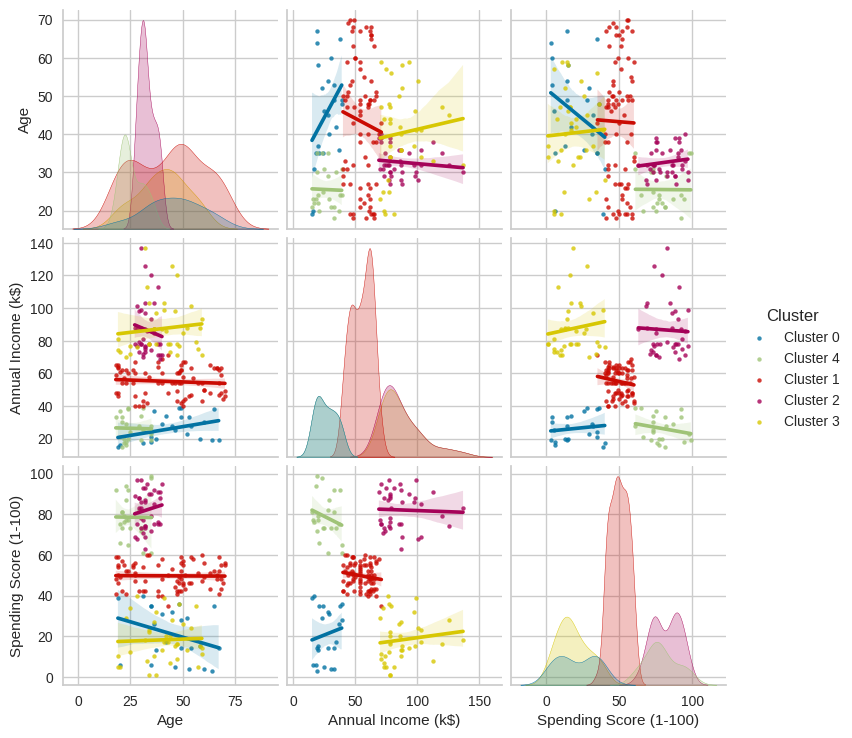

In [66]:
# explore relationship
plot_kws = {'scatter_kws': {'s': 10}}
sns.pairplot(result_k5, kind='reg', vars=result_k5.columns[1:4], plot_kws=plot_kws, hue="Cluster")
plt.show()

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

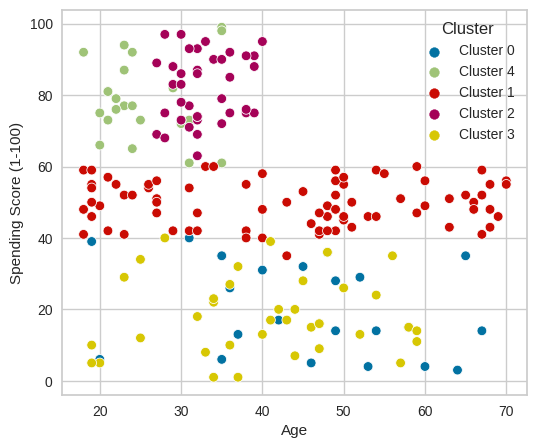

In [76]:
# Age and spending score between cluster
sns.scatterplot(data=result_k5, x="Age", y="Spending Score (1-100)", hue="Cluster")

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

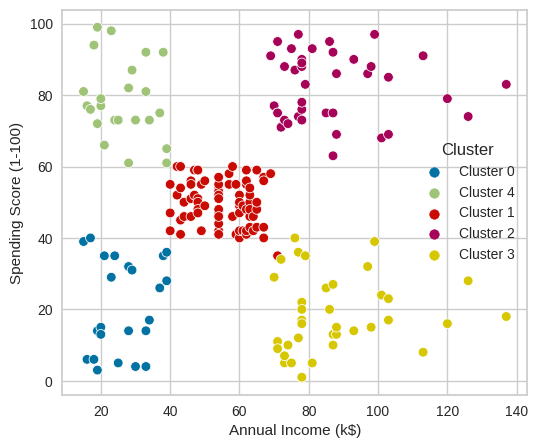

In [67]:
# Annual income and spending score between cluster
sns.scatterplot(data=result_k5, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster")

In [95]:
# summary table
result_k5.groupby('Cluster').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
Cluster 0,45.217391,26.304348,20.913043
Cluster 1,43.282051,55.025641,49.692308
Cluster 2,32.692308,86.538462,82.128205
Cluster 3,40.324324,87.432432,18.189189
Cluster 4,25.521739,26.304348,78.565217


<Axes: xlabel='Cluster'>

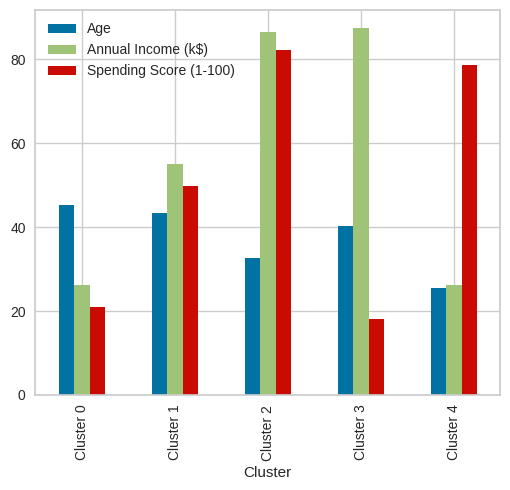

In [70]:
result_k5.groupby('Cluster').mean().plot.bar()

In [71]:
# group by cluster and gender
result_k5.groupby(['Cluster','Gender'])['Age'].count()

Cluster    Gender
Cluster 0  Female    14
           Male       9
Cluster 1  Female    45
           Male      33
Cluster 2  Female    21
           Male      18
Cluster 3  Female    18
           Male      19
Cluster 4  Female    14
           Male       9
Name: Age, dtype: int64

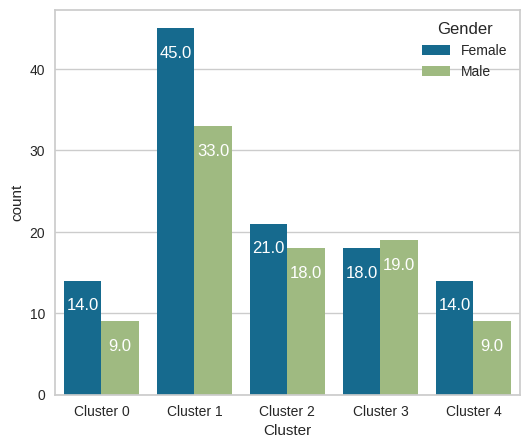

In [73]:
ax = sns.countplot(data=result_k5, x="Cluster", hue="Gender", order = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=12)

In [74]:
# To dive deeper in each cluster, we can filter each cluster using .query
# for example
cluster3 = result_k5.query("Cluster == 'Cluster 3'")

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
124,Female,23,70,29,Cluster 3
128,Male,59,71,11,Cluster 3
130,Male,47,71,9,Cluster 3
132,Female,25,72,34,Cluster 3
134,Male,20,73,5,Cluster 3
136,Female,44,73,7,Cluster 3
138,Male,19,74,10,Cluster 3
140,Female,57,75,5,Cluster 3
142,Female,28,76,40,Cluster 3
144,Male,25,77,12,Cluster 3


## Summary of each clusters

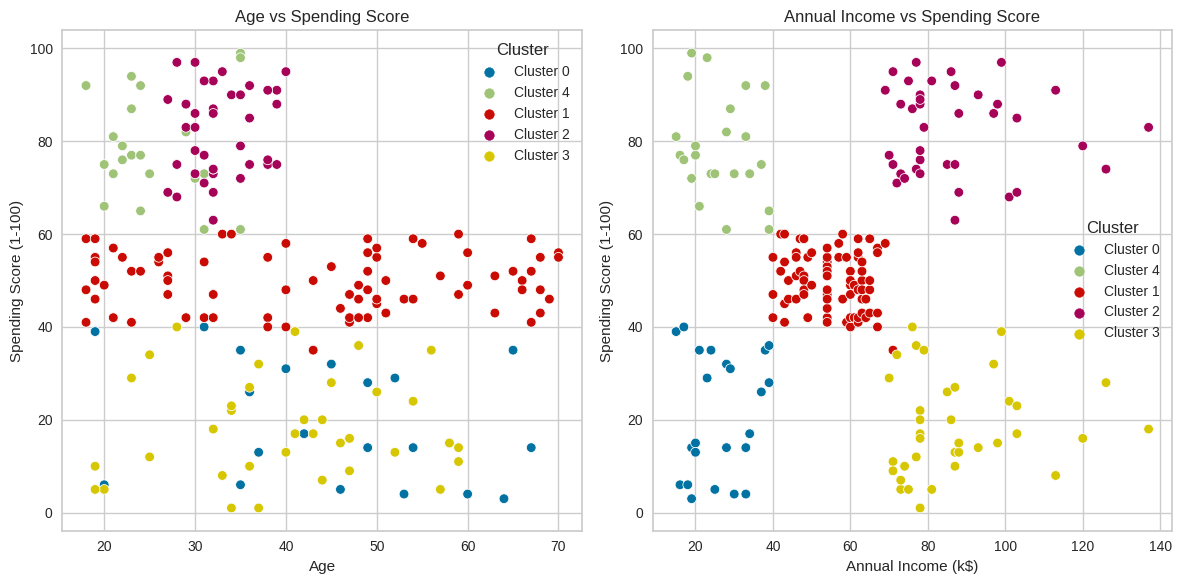

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot
sns.scatterplot(data=result_k5, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Cluster", ax=axes[1])
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Spending Score (1-100)')
axes[1].set_title('Annual Income vs Spending Score')

# Second scatter plot

sns.scatterplot(data=result_k5, x="Age", y="Spending Score (1-100)", hue="Cluster", ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Spending Score (1-100)')
axes[0].set_title('Age vs Spending Score')

plt.tight_layout()
plt.show()

In [98]:
result_k5.groupby('Cluster').agg(['min','max','mean','std'])

Age                           Annual Income (k$)                  \
          min max       mean        std                min  max       mean   
Cluster                                                                      
Cluster 0  19  67  45.217391  13.228607                 15   39  26.304348   
Cluster 1  18  70  43.282051  16.494704                 40   71  55.025641   
Cluster 2  27  40  32.692308   3.728650                 69  137  86.538462   
Cluster 3  19  59  40.324324  11.525465                 70  137  87.432432   
Cluster 4  18  35  25.521739   5.273170                 15   39  26.304348   

                     Spending Score (1-100)                            
                 std                    min max       mean        std  
Cluster                                                                
Cluster 0   7.893811                      3  40  20.913043  13.017167  
Cluster 1   8.439201                     35  60  49.692308   6.186092  
Cluster 2  16.312485                     63  97  82.128205   9.364489  
Cluster 3  16.272916                      1  40  18.189189  10.715611  
Cluster 4   7.893811                     61  99  78.565217  10.953729

K-means algorithms generated the following 5 clusters
- Cluster 0: Clients with **low** annual income and **low** spending score
- Cluster 1: Clients with **medium** annual income and **medium** spending score
- Cluster 2: Clients with **high** annual income and **high** spending score
- Cluster 3: Clients with **high** annual income and **low** spending score
- Cluster 4: Clients with **low** annual income and **high** spending score

In terms of age, there're no distinct group except for Cluster 4 which contains the youngest group of clients refer to theirs average age